# Example - 39 - Oceanus - Saturn (Concept)

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates the atmospheric entry of the Saturn entry probe which was part of the Oceanus mission study
https://doi.org/10.1016/j.asr.2017.02.012

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("SATURN")  
planet.h_skip = 1200.0E3
planet.h_trap = -100.0E3
planet.loadAtmosphereModel('../atmdata/Saturn/saturn-nominal.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [4]:
# Set up the vehicle
vehicle=Vehicle('Oceanus-Saturn-Probe', 140.0, 127.0, 0.0, np.pi*1.0**2.0*0.25, 0.0, 0.18, planet)

In [5]:
# Set up entry parameters
vehicle.setInitialState(1200.0,0.0,0.0,28.46,0.0,-11.40,0.0,0.0)

In [6]:
# Set up solver
vehicle.setSolverParams(1E-6)

In [7]:
# Propogate vehicle entry trajectory
vehicle.propogateEntry (100*60.0,0.1,0.0)

In [8]:
# import rcParams to set figure font type
from matplotlib import rcParams

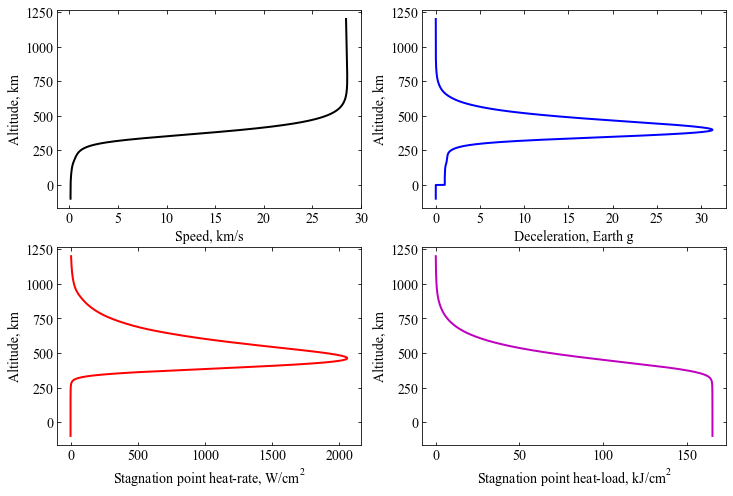

In [9]:
fig = plt.figure(figsize=(12,8))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle.v_kmsc, vehicle.h_kmc, 'k-', linewidth=2.0)
plt.xlabel('Speed, km/s',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 2)
plt.plot(vehicle.acc_net_g, vehicle.h_kmc, 'b-', linewidth=2.0)
plt.xlabel('Deceleration, Earth g',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 3)
plt.plot(vehicle.q_stag_total, vehicle.h_kmc,'r-', linewidth=2.0)
plt.xlabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)


plt.subplot(2, 2, 4)
plt.plot(vehicle.heatload/1.0E3, vehicle.h_kmc, 'm-', linewidth=2.0)
plt.xlabel('Stagnation point heat-load, '+r'$kJ/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/oceanus-saturn-probe.png',bbox_inches='tight')
plt.savefig('../plots/oceanus-saturn-probe.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/oceanus-saturn-probe.eps', dpi=300,bbox_inches='tight')

plt.show()

The max. heat rate is smaller than reported in the paper by about a factor of 3. The difference is attributed to different heating correlations used.